In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf

In [3]:
dsm_hist_monthly = xr.open_dataset('HadGEM3-GC31-LL_historical.nc').sel(time=slice('1960','2019'))
dsm_s585_monthly = xr.open_dataset('HadGEM3-GC31-LL_ssp585.nc').sel(time=slice('2080','2099'))

dsm_hist = dsm_hist_monthly.groupby('time.month').mean('time')
dsm_s585 = dsm_s585_monthly.groupby('time.month').mean('time')

minlon = -90
maxlon = 170
minlat = -85
maxlat = 0

southm_hist = dsm_hist.sel(month=[11,12,1,2,3,4], lon=slice(minlon,maxlon), lat=slice(minlat,maxlat)).mean(dim='month')
southm_s585 = dsm_s585.sel(month=[11,12,1,2,3,4], lon=slice(minlon,maxlon), lat=slice(minlat,maxlat)).mean(dim='month')

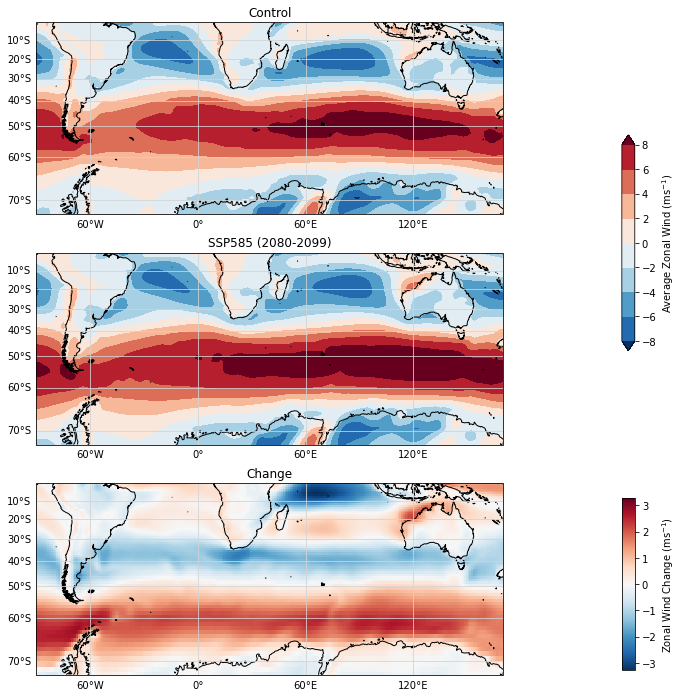

In [4]:
fig = plt.figure(figsize=(12,12))
gs = fig.add_gridspec(3, 1)

projection=ccrs.Mercator(central_longitude=0.0, min_latitude=-72.5, max_latitude=-0.0)

ax1 = fig.add_subplot(gs[0], projection=projection)
ax2 = fig.add_subplot(gs[1], projection=projection)
ax3 = fig.add_subplot(gs[2], projection=projection)

for ax in [ax1,ax2,ax3]:
    ax.set_extent([minlon, maxlon, minlat, maxlat], crs=ccrs.PlateCarree())
    ax.coastlines(resolution='50m', color='k')
    gl = ax.gridlines(color='lightgrey', linestyle='-', draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False

p1 = southm_hist.uas.plot.contourf(ax=ax1, x='lon', y='lat', add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=-8, vmax=8, levels=9)
p2 = southm_s585.uas.plot.contourf(ax=ax2, x='lon', y='lat', add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=-8, vmax=8, levels=9)
p3 = (southm_s585-southm_hist).uas.plot.pcolormesh(ax=ax3, x='lon', y='lat', add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu_r', center=0)

ax1.set_title('Control')
ax2.set_title('SSP585 (2080-2099)')
ax3.set_title('Change')

ax_cb = plt.axes([0.92, 0.5, 0.015, 0.25])
ax_cb2 = plt.axes([0.92, 0.13, 0.015, 0.2])
cb = plt.colorbar(p1,cax=ax_cb, orientation='vertical')
cb2 = plt.colorbar(p3,cax=ax_cb2, orientation='vertical')
cb.ax.set_ylabel(r'Average Zonal Wind (ms$^{-1})$')
cb2.ax.set_ylabel(r'Zonal Wind Change (ms$^{-1})$')
#ax.set_suptitle('Southern Ocean Surface Wind: November-April')
#plt.savefig('southern_ocean_zonal_change.png')
plt.show()